# **Import needed libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


# **Load Data**


In [2]:
Train_df = 'D://Brain-Tumor-Detection//Dataset//Training'

filepaths = []
labels = []
folds = os.listdir(Train_df)
for fold in folds:
    FoldPath = os.path.join(Train_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 827/827 [00:00<00:00, 413283.62it/s]


In [3]:
print(len(filepaths))
print(len(labels))


2870
2870


In [4]:
print(labels[-1])


pituitary_tumor


In [5]:
print(np.unique(labels))

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [6]:
df_train = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [7]:
df_train.head()

,filepath,label
0,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
1,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
2,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
3,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
4,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor


In [8]:
color = ['#9AA6B2','#BCCCDC','#D9EAFD','#F8FAFC']

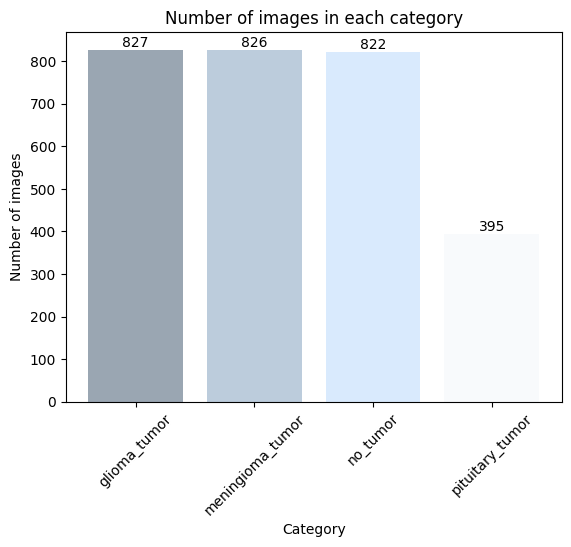

In [9]:
 
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()


In [10]:
df_train.sample(5)

,filepath,label
760,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
2477,D://Brain-Tumor-Detection//Dataset//Training\p...,pituitary_tumor
2762,D://Brain-Tumor-Detection//Dataset//Training\p...,pituitary_tumor
289,D://Brain-Tumor-Detection//Dataset//Training\g...,glioma_tumor
1816,D://Brain-Tumor-Detection//Dataset//Training\n...,no_tumor


In [11]:
Test_df = 'D://Brain-Tumor-Detection//Dataset//Testing'

filepaths = []
labels = []
folds = os.listdir(Test_df)
for fold in folds:
    FoldPath = os.path.join(Test_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 74/74 [00:00<?, ?it/s]


In [12]:
print(len(filepaths))
print(len(labels))


394
394


In [13]:
print(np.unique(labels))

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [14]:
df_test = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

In [15]:
df_test.head()

,filepath,label
0,D://Brain-Tumor-Detection//Dataset//Testing\gl...,glioma_tumor
1,D://Brain-Tumor-Detection//Dataset//Testing\gl...,glioma_tumor
2,D://Brain-Tumor-Detection//Dataset//Testing\gl...,glioma_tumor
3,D://Brain-Tumor-Detection//Dataset//Testing\gl...,glioma_tumor
4,D://Brain-Tumor-Detection//Dataset//Testing\gl...,glioma_tumor


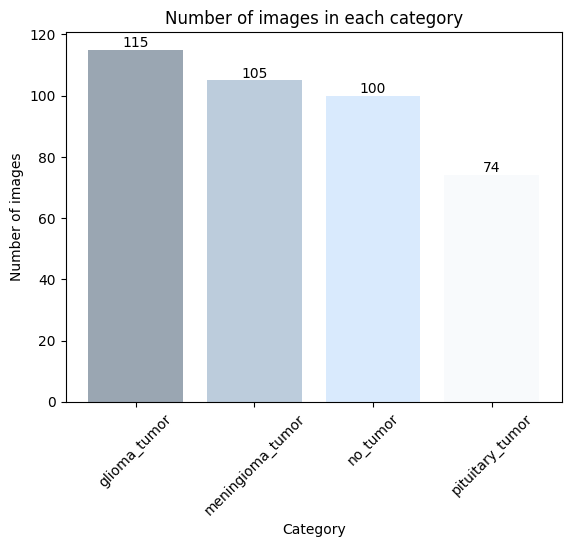

In [16]:

fig, ax = plt.subplots()
bars = ax.bar(df_test['label'].unique(), df_test['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()


# **Split data into train, test, valid**

In [17]:
valid_ts, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [18]:
tr_gen = ImageDataGenerator(rescale=1/255)
ts_gen = ImageDataGenerator(rescale=1/255)
batchsize = 32
img_size = (224,224)

In [19]:
gen_train = tr_gen.flow_from_dataframe(df_train, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_valid = ts_gen.flow_from_dataframe(valid_ts, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_test = ts_gen.flow_from_dataframe(df_test, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=False ,color_mode='rgb')

Found 2870 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.


In [20]:
class_dict = gen_train.class_indices


# **Building Deep Learning Model¶**

In [21]:

Model = Sequential([
    Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(img_size[0],img_size[1],3)),
    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(265, kernel_size= (3,3), activation='relu'),
    Conv2D(265, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0,3),
    Dense(4, activation='softmax') ])

In [22]:
Model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = Model.fit(
    gen_train, 
    epochs=50, 
    validation_data=gen_valid, 
    verbose=1, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1422s 16s/step - accuracy: 0.2861 - loss: 1.3671 - val_accuracy: 0.2487 - val_loss: 1.4741
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1907s 21s/step - accuracy: 0.4593 - loss: 1.2039 - val_accuracy: 0.2234 - val_loss: 2.2397
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2106s 23s/step - accuracy: 0.6454 - loss: 0.8237 - val_accuracy: 0.3198 - val_loss: 1.5577
Epoch 4/50
77/90 ━━━━━━━━━━━━━━━━━━━━ 5:42 26s/step - accuracy: 0.6857 - loss: 0.7433

In [59]:
print(Model.evaluate(gen_train))
print(Model.evaluate(gen_valid))
print(Model.evaluate(gen_test))

179/179 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.9995 - loss: 0.0024
[0.002833294915035367, 0.9989495873451233]
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9882 - loss: 0.0607
[0.06332453340291977, 0.989313006401062]
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9682 - loss: 0.2085
[0.16909627616405487, 0.9679877758026123]


In [60]:
Model.save('Model m.h5')

In [65]:
preds = Model.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


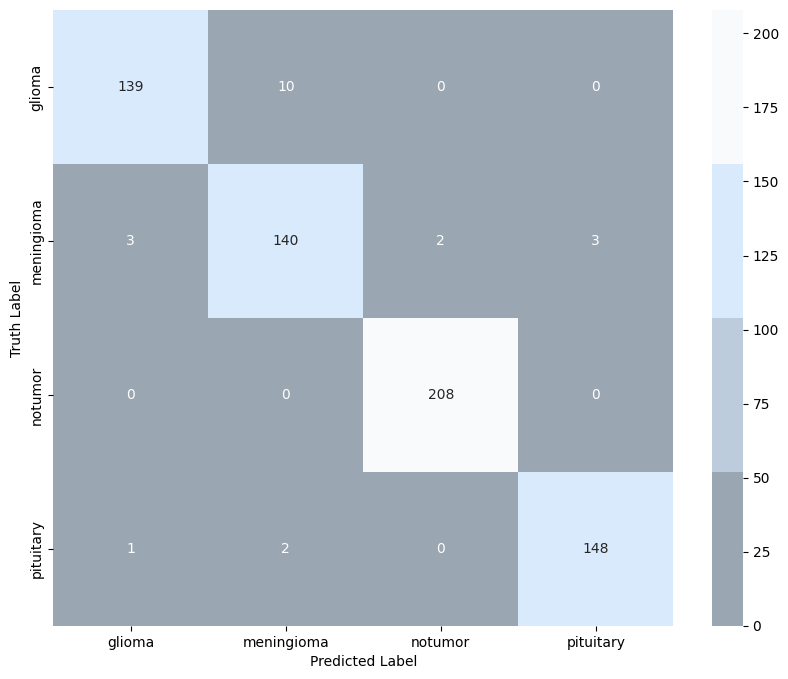

In [71]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

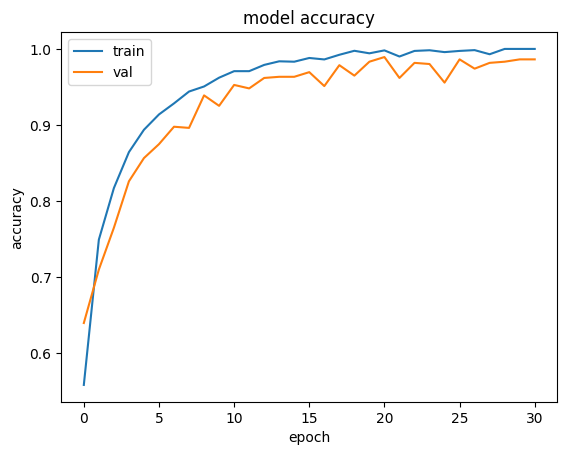

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

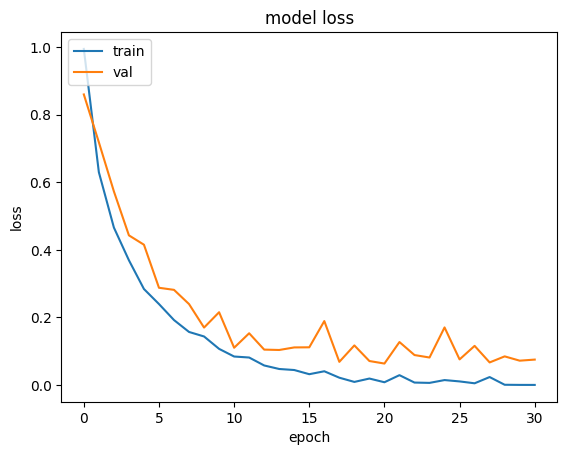

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

Visualize model performance

In [82]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = Model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


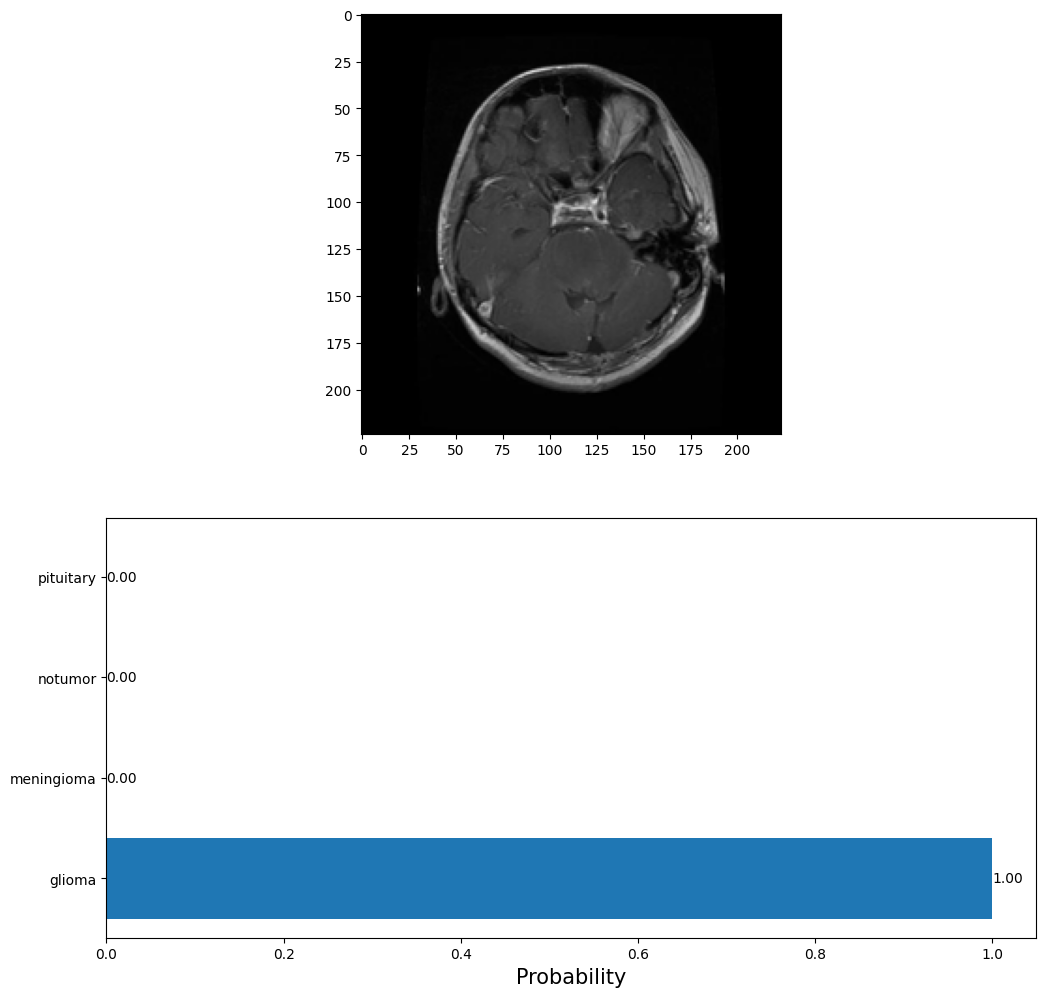

In [83]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


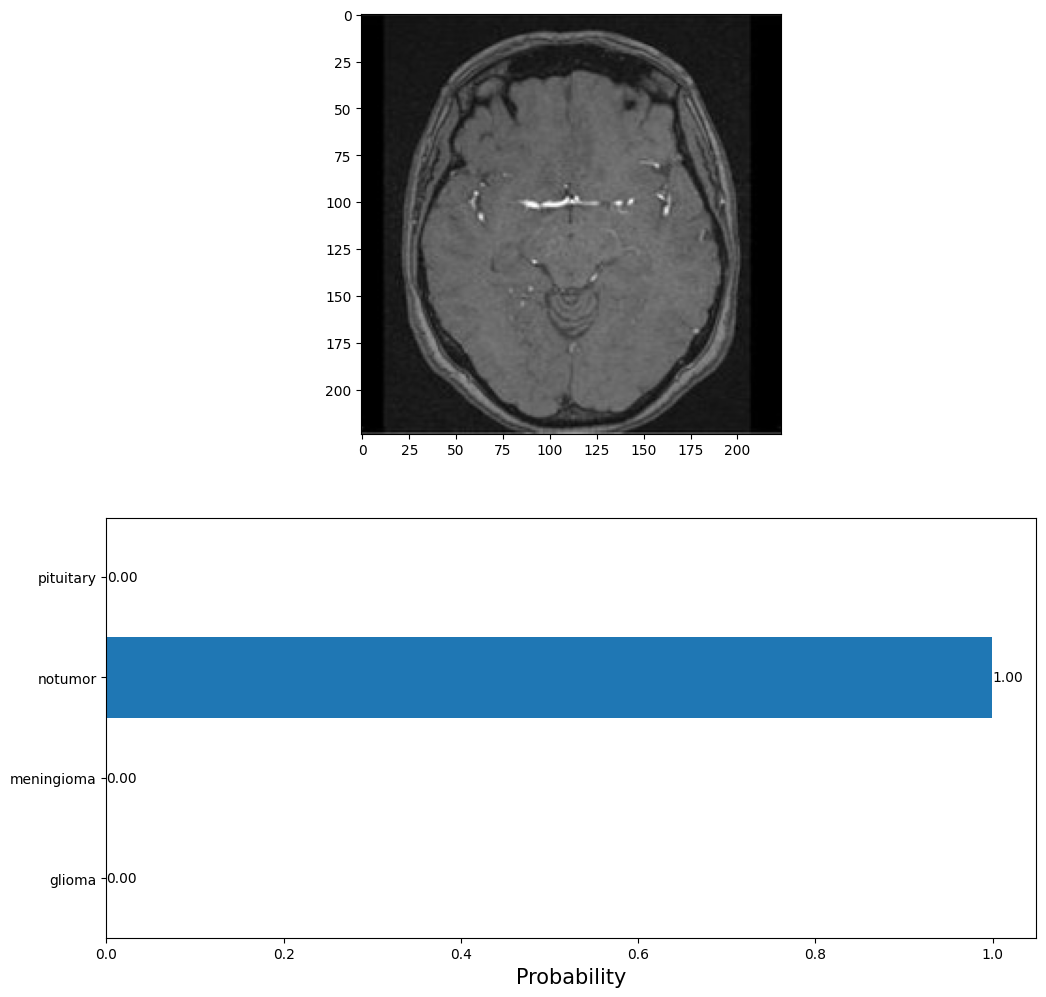

In [84]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0017.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


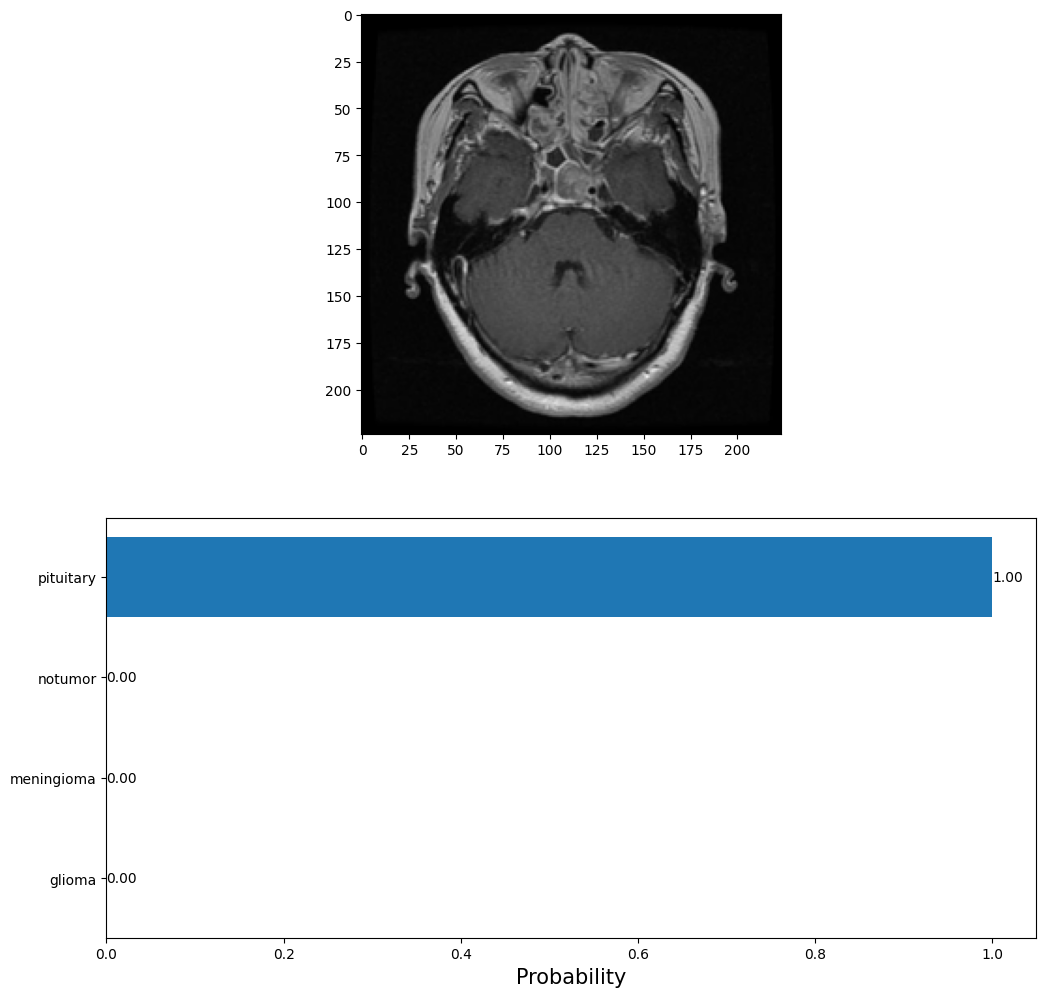

In [85]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0059.jpg')

 # **NOTE** : --> It is clear that there is overfitting, so I will use a pretrained model.

In [86]:
base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
)

In [87]:
ModelPretrained = Sequential([
    base_model,
    
    Dense(256 , activation='relu'),
    Dropout(0,3),
    Dense(4, activation='softmax')
    
])
ModelPretrained.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [88]:
history_Final = ModelPretrained.fit(
    gen_train, 
    epochs=5, 
    validation_data=gen_valid, 
    verbose=1, 
    
)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 500ms/step - accuracy: 0.7641 - loss: 1.8337 - val_accuracy: 0.2626 - val_loss: 1.5665
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9635 - loss: 0.1060 - val_accuracy: 0.3221 - val_loss: 1.6735
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.9854 - loss: 0.0478 - val_accuracy: 0.6046 - val_loss: 1.0989
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9901 - loss: 0.0264 - val_accuracy: 0.8534 - val_loss: 0.5403
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9817 - val_loss: 0.0491


# **Testing and Evaluation**


In [89]:
train_score = ModelPretrained.evaluate(gen_train, verbose=1)
valid_score = ModelPretrained.evaluate(gen_valid, verbose=1)
test_score = ModelPretrained.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9993 - loss: 0.0048
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9782 - loss: 0.0570
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9936 - loss: 0.0200
Train Loss: 0.0048
Train Accuracy: 99.93%
--------------------
Validation Loss: 0.0491
Validation Accuracy: 98.17%
--------------------
Test Loss: 0.0167
Test Accuracy: 99.54%


In [90]:
ModelPretrained.save('Model Final Brain Tumor.h5')

# **Visualize model performance**

In [91]:
preds = ModelPretrained.predict(gen_test)
y_pred = np.argmax(preds, axis=1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 420ms/step


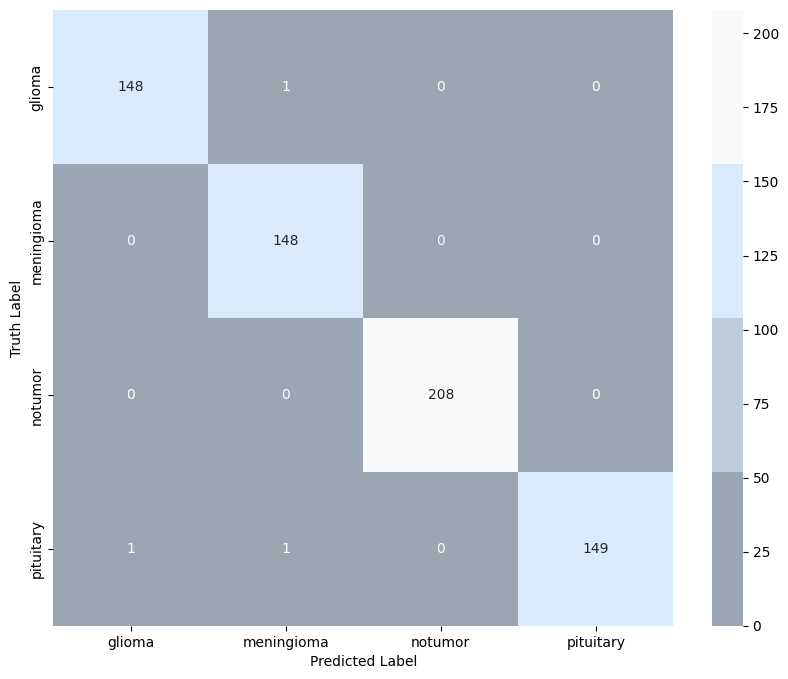

In [92]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

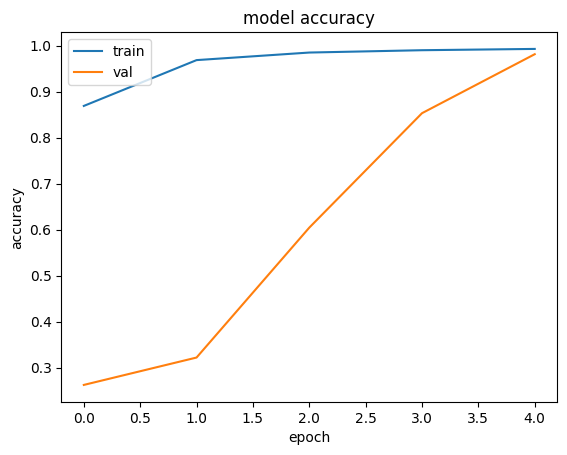

In [94]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

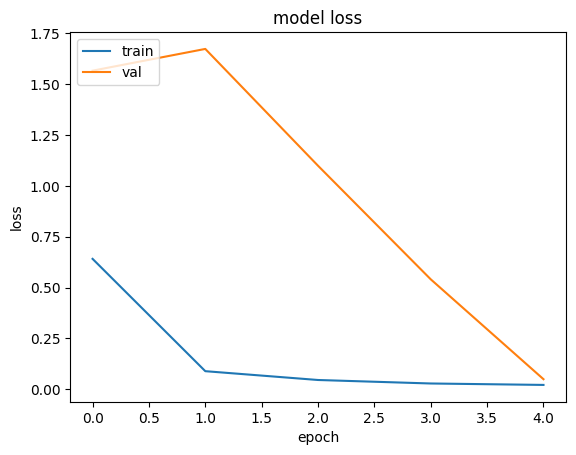

In [95]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [102]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrained.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


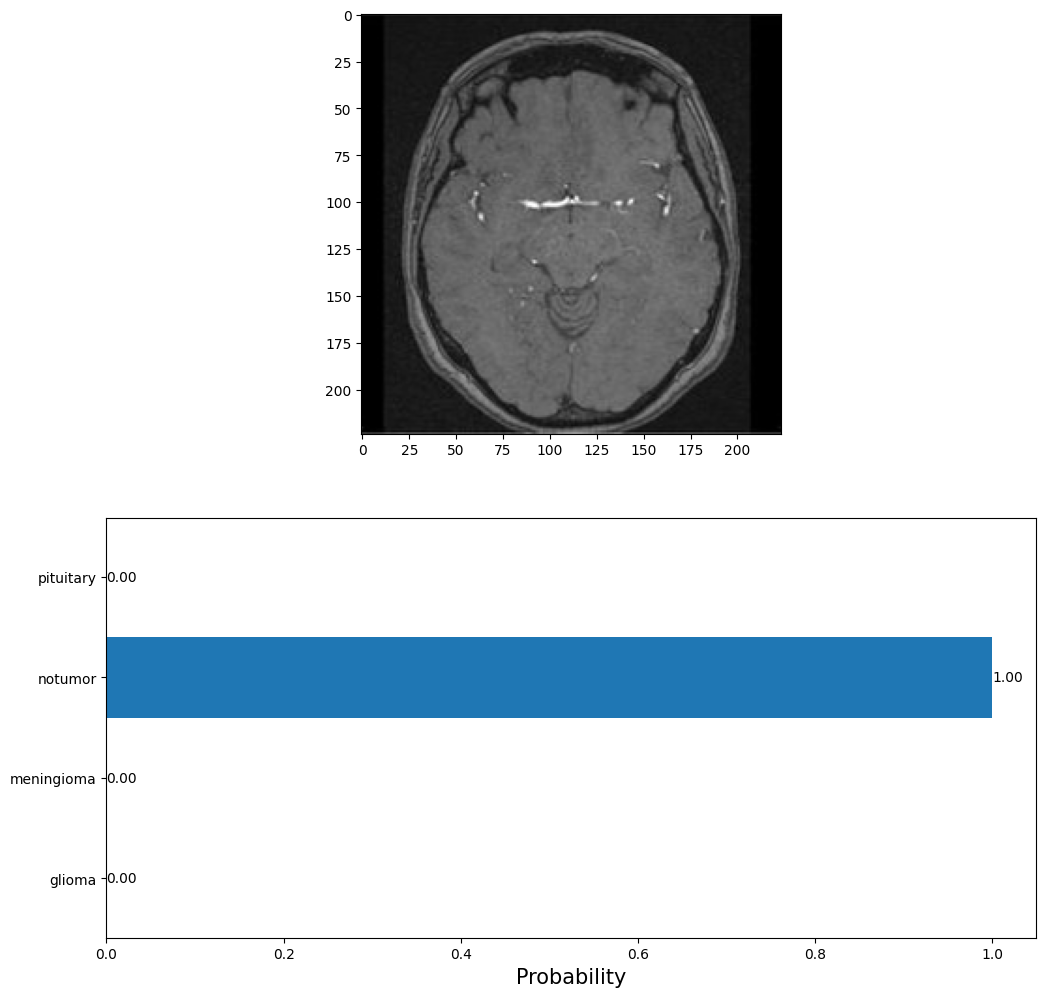

In [103]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0017.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


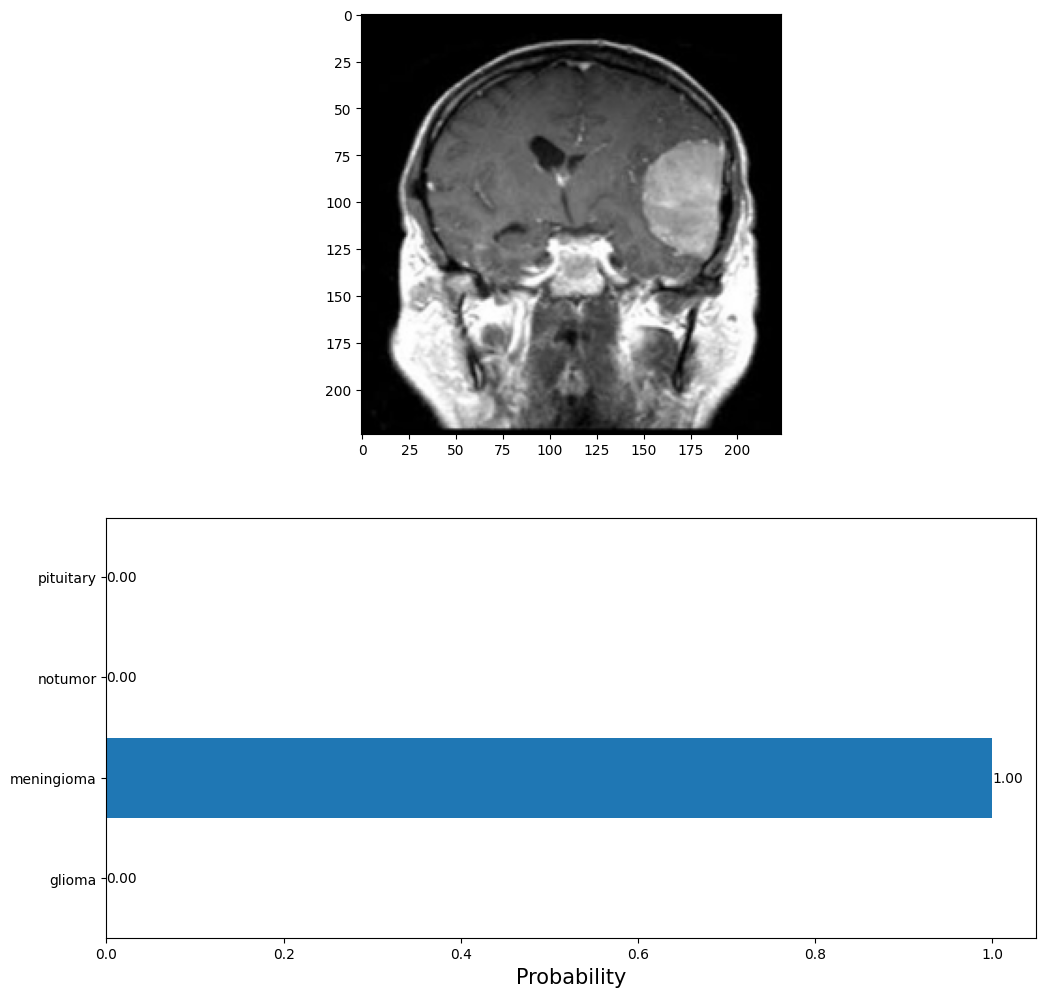

In [105]:
predict('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0016.jpg')